## Suposições de Suavização Exponencial

A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. É útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

No Statsmodels, a classe SimpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades

As principais suposições do modelo SimpleExpSmoothing são as seguintes:
- A série temporal é composta por um componente de nível (média) e um componente aleatório (ruído). Não há componentes de tendência ou sazonalidade na série
- O componente de nível é uma média ponderada dos valores passados,  com pesos que diminuem exponencialmente à medida que os dados ficam mais sdistantes no passado
- O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
df = pd.read_csv('dataset.csv')

In [8]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [9]:
#convertendo a coluna Data para 'datetime'
df['Data'] = pd.to_datetime(df['Data'])

In [11]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [13]:
#convertendo o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [14]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [15]:
#Frequencia da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

In [17]:
modelo = SimpleExpSmoothing(serie_temporal)

Esta linha acima cria uma instância da classe SimpleExpSmoothing, utilizando a coluna 'Vendas' da série serie_temporal como entrada

In [19]:
modelo_ajustado = modelo.fit(smoothing_level=0.2, optimized=False)

Esta linha acima faz uma chamada ao método fit() para ajustar o modello de suavização exponencial aos dados. O argumento smoothihng_level = 0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1

In [23]:
#extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

Esta linha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão

O resultado final é uma nova série temporal chamada suavização_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo

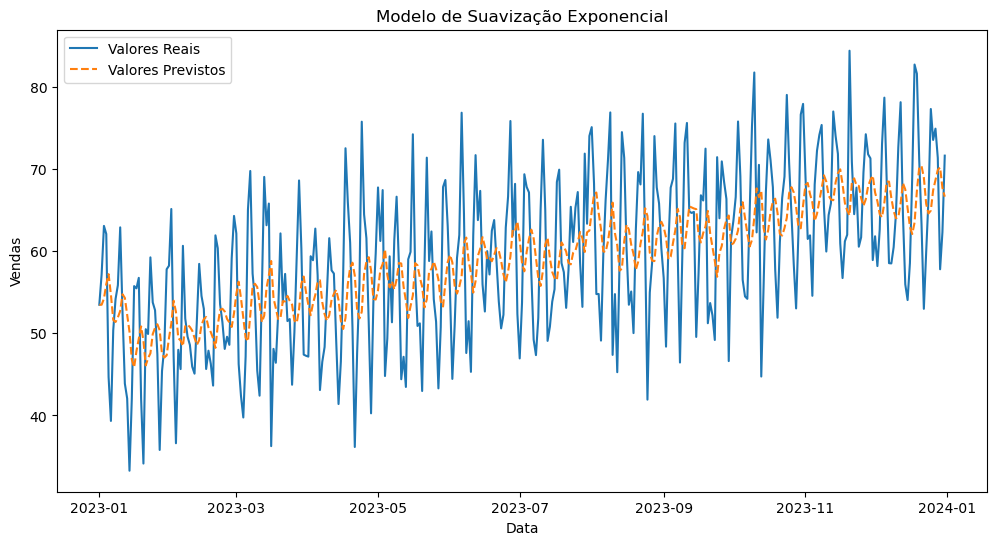

In [24]:
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## Deploy e Previsão com o Modelo Treinado

In [26]:
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [27]:
print('Previsão do Total de Vendas para Janeiro/2024:', round(previsoes[0], 4))

Previsão do Total de Vendas para Janeiro/2024: 67.6499


C:\Users\carol\AppData\Local\Temp\ipykernel_9724\723525165.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Previsão do Total de Vendas para Janeiro/2024:', round(previsoes[0], 4))
